# Mathematics of Machine Learning

## Programming tasks: The creditworthiness assessment

Import required modules

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Define hypotheses:
for example h1, which takes the value 1 if x < 4400 and the value 0 if x >= 4400

In [2]:
# Define hypotheses
# h1 takes the value 1 if x < 4400 and the value 0 if x >= 4400
def h1(x): return x < 4400
def h2(x): return x < 4600
def h3(x): return x < 4800
def h4(x): return x < 5000
def h5(x): return x < 5200
def h6(x): return x < 5400
def h7(x): return x < 5600
def h8(x): return x < 5800
def h9(x): return x < 6000
def h10(x): return x < 6200

Define true hypothesis

In [3]:
# Define true hypothesis
def h_true(x): return x < 5400

##### Simulation of Machine Learning

Size of training datasets

In [4]:
# Size of training datasets
M = 1000

Amount of data per training dataset

In [5]:
N = 10 
eps = 0.1
delta = 0.05
m = np.ceil((np.log(N/delta)) / eps)
print(f"m = {m}")

# m = 27
# m = 89
# m = 5

m = 53.0


Create Mx1 vector which consists of zeros

In [6]:
RS_min = np.zeros((M, 1))
h_S = np.zeros((M, 1))
# print(f"RS_min = {RS_min}")
# print(f"h_S = {h_S}")

Empirical risk for the 10 hypotheses. 
Here we take the mean value of the vector that we form by evaluating != between h(earnings) and credit_default. 
The symbol != compares the two vectors element by element and sets 0 
if two elements at the same position in the vector are identical, 
otherwise 1 at the respective position.

In [7]:
def RS(h): return np.mean(h(earnings) != credit_default)

In [8]:
# Set seed for comparability
np.random.seed(17)

In [12]:
for j in range(0, M):
    # uniform(size=(m, 1)) returns a vector with m generated uniformly distributed random numbers
    earnings = np.array([3000 + 4000*i for i in np.random.uniform(size=(int(m), 1))])
    # print(earnings)

    # earnings = np.array([1000 + 7000*i for i in np.random.uniform(size=(int(m), 1))])

    credit_default = h_true(earnings)
    # print(credit_default)

    # List of empirical risks
    R_h = np.zeros((10, 1))
    # print(f"R_h = {R_h}")
    # print(R_h[0])

    # Evaluation of the empirical risks
    R_h[0] = RS(h1)
    R_h[1] = RS(h2)
    R_h[2] = RS(h3)
    R_h[3] = RS(h4)
    R_h[4] = RS(h5)
    R_h[5] = RS(h6)
    R_h[6] = RS(h7)
    R_h[7] = RS(h8)
    R_h[8] = RS(h9)
    R_h[9] = RS(h10)

    # print(f"R_h = {R_h}")

    # Determine the minimizer of the empirical risk and store it in the corresponding vectors.
    RS_min[j], h_S[j] = np.amin(R_h), (np.argmin(R_h) + 1)
    # print(RS_min[j], h_S[j])

Graphical visualization

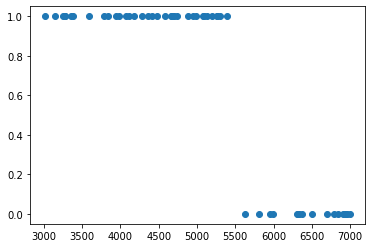

In [15]:
fig, ax = plt.subplots()
ax.scatter(earnings, credit_default)
plt.show()

Graphical visualization

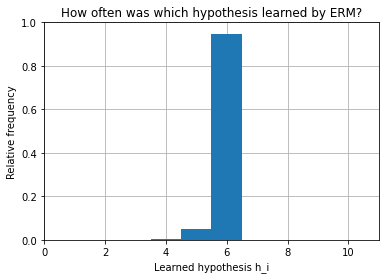

In [17]:
fig2, ax2 = plt.subplots()
ax2.hist(h_S, bins=np.arange(0.5, 11.5, 1), density=True, zorder=3)
ax2.grid(zorder=0)
plt.ylim(top = 1)
plt.title("How often was which hypothesis learned by ERM?")
plt.xlabel("Learned hypothesis h_i")
plt.ylabel("Relative frequency")
plt.show()

Checking how often the hypothesis i was learned...

In [18]:
# Checking how often the hypothesis i was learned...
i = 6
print(np.mean(h_S == i))

0.948


### Answer